In [1]:
import pandas as pd
import os
import glob
import numpy as np
from pathlib import Path
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# get current working directory to construct absolute path to CMS-DE-SynPuf-VB/downloads/inpatient_claims folder
cwd = os.getcwd()
ls = cwd.split(os.sep)

In [3]:
# construct path to CMS-DE-SynPuf-VB/downloads/inpatient_claims
path_ic = ls[0] + os.sep + '**' + os.sep + 'CMS-DE-SynPuf-VB' + os.sep + 'downloads' + os.sep + 'inpatient_claims' + os.sep + '*.csv'

In [4]:
# use glob to filter out the files in CMS-DE-SynPuf-VB/downloads/inpatient_claims with the extension .csv
ic_files = glob.glob(path_ic, recursive=True)

# however, because glob will find the file in every subdirectory, files will have
# several paths. there is a need to establish a base part of a url so we can have 
# only one instance of each file

# arbitrarily select the first string in one glob list and use that to establish
# the base path with which to extract paths from the larger glob lists

full_path = ic_files[0]
split_path = full_path.split(os.sep)
tgt = split_path.index('CMS-DE-SynPuf-VB')
base_path = os.sep.join(split_path[0:tgt]) + os.sep

valid_ic_files = [x for x in ic_files if x.startswith(base_path)]

In [15]:
# create a consolidated df
ic_df = pd.concat([pd.read_csv(ic_file) for ic_file in valid_ic_files], ignore_index=True)
ic_df = ic_df[['CLM_ID', 'DESYNPUF_ID', 'CLM_ADMSN_DT']]
ic_df['CLM_ID'] = ic_df['CLM_ID'].astype(str) 
ic_df['CLM_ADMSN_DT'] = ic_df['CLM_ADMSN_DT'].astype(str) 

ic_df

,CLM_ID,DESYNPUF_ID,CLM_ADMSN_DT
0,196661176988405,00013D2EFD8E45D1,20100312
1,196201177000368,00016F745862898F,20090412
2,196661177015632,00016F745862898F,20090831
3,196091176981058,00016F745862898F,20090917
4,196261176983265,00016F745862898F,20100626
...,...,...,...
1332817,992891161660972,FFFE4E347796686D,20080910
1332818,992021161651979,FFFE4E347796686D,20081125
1332819,992581161650328,FFFE4E347796686D,20100201
1332820,992731161641904,FFFFEE90E1B4D0DF,20080220


In [16]:
merged_bs_df = pd.read_csv('merged_beneficiary_summary.csv')
merged_bs_df

,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_HMO_CVRAGE_TOT_MONS
0,2008,00013D2EFD8E45D1,19230501,NaN,1,1,26,12
1,2008,00016F745862898F,19430101,NaN,1,1,39,0
2,2008,0001FDD721E223DC,19360901,NaN,2,1,39,0
3,2008,00021CA6FF03E670,19410601,NaN,1,5,6,0
4,2008,00024B3D2352D2D0,19360801,NaN,1,1,52,0
...,...,...,...,...,...,...,...,...
6760515,2010,FFFB2D0ED0E52160,19460901,NaN,2,1,4,0
6760516,2010,FFFC020559E4F5B7,19311101,NaN,2,1,23,0
6760517,2010,FFFE39796B08C919,19400801,NaN,1,1,39,0
6760518,2010,FFFE4E347796686D,19330101,NaN,1,1,50,0


Let's join `ic_df` with `merged_bs_df`:

In [17]:
bs_ic_df = pd.merge(merged_bs_df, ic_df, on='DESYNPUF_ID', how='outer')
bs_ic_df

,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_HMO_CVRAGE_TOT_MONS,CLM_ID,CLM_ADMSN_DT
0,2008,00013D2EFD8E45D1,19230501,NaN,1,1,26,12,196661176988405,20100312
1,2009,00013D2EFD8E45D1,19230501,NaN,1,1,26,12,196661176988405,20100312
2,2008,00016F745862898F,19430101,NaN,1,1,39,0,196201177000368,20090412
3,2008,00016F745862898F,19430101,NaN,1,1,39,0,196661177015632,20090831
4,2008,00016F745862898F,19430101,NaN,1,1,39,0,196091176981058,20090917
...,...,...,...,...,...,...,...,...,...,...
8456644,2008,FFFFEE90E1B4D0DF,19361201,NaN,1,1,42,0,992921161631730,20080509
8456645,2009,FFFFEE90E1B4D0DF,19361201,NaN,1,1,42,0,992731161641904,20080220
8456646,2009,FFFFEE90E1B4D0DF,19361201,NaN,1,1,42,0,992921161631730,20080509
8456647,2010,FFFFEE90E1B4D0DF,19361201,NaN,1,1,42,0,992731161641904,20080220


Some people tend not to visit the hospital even when necessary despite having coverage. Let's see the number of claims per `BENE_RACE_CD` and `SP_STATE_CODE`:

In [22]:
claims_by_race = bs_ic_df.groupby(['BENE_RACE_CD', 'YEAR'])['CLM_ID'].count()
claims_by_race

BENE_RACE_CD  YEAR
1             2008    1121621
              2009    1118447
              2010    1052588
2             2008     140679
              2009     140254
              2010     132025
3             2008      43373
              2009      43239
              2010      40808
5             2008      27149
              2009      27081
              2010      25572
Name: CLM_ID, dtype: int64

It seems Hispanic patients made the least claims each year, but this is not too helpful lacking context about the United States' demographics from 2008 to 2010.

In [29]:
claims_by_locale = bs_ic_df.groupby(['SP_STATE_CODE', 'YEAR'])['CLM_ID'].count()
claims_by_locale

SP_STATE_CODE  YEAR
1              2008    26828
               2009    26761
               2010    25340
2              2008     1781
               2009     1781
                       ...  
53             2009     2594
               2010     2450
54             2008     9242
               2009     9224
               2010     8737
Name: CLM_ID, Length: 156, dtype: int64

In [30]:
bottom_3 = claims_by_locale.nsmallest(9)
bottom_3

SP_STATE_CODE  YEAR
2              2010    1691
               2008    1781
               2009    1781
9              2010    2083
               2009    2215
               2008    2225
53             2010    2450
               2009    2594
               2008    2602
Name: CLM_ID, dtype: int64

Per [Wikipedia.org](https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations), here are the mappings for the above `SP_STATE_CODE` entries:
`2: AK (Alaska)`
`9: CT (Connecticut)`
`53: WA (Washington)`

Interestingly, two of the three locales with the lowest number of Medicare claims each year from 2008 to 2010 are the same locales with the lowest `AGE_DEATH` from `beneficiary_summary_eda.ipynb`: `2: AK (Alaska)` and `53: WA (Washington)` 

Finally, let's see how much time passed between hospital admissions and death on average:

In [31]:
# standardize date columns to avoid any pesky decimals
def clean_for_dt(col):
    if col == 'nan':
        return np.nan
    else:
        return col[0:8]
    
def to_dt(col):
    if col == 'nan':
        return np.nan
    else:
        return datetime.datetime.strptime(col, '%Y%m%d')

In [34]:
bs_ic_df['BENE_DEATH_DT'] = bs_ic_df['BENE_DEATH_DT'].astype(str).map(lambda x: clean_for_dt(x))
bs_ic_df['CLM_ADMSN_DT'] = bs_ic_df['CLM_ADMSN_DT'].astype(str).map(lambda x: clean_for_dt(x))

In [35]:
bs_ic_df['BENE_DEATH_DT'] = bs_ic_df['BENE_DEATH_DT'].astype(str).map(lambda x: to_dt(x))
bs_ic_df['CLM_ADMSN_DT'] = bs_ic_df['CLM_ADMSN_DT'].astype(str).map(lambda x: to_dt(x))

Create a column called `SURVIVAL_FROM_CLAIM` measured in months:

In [42]:
bs_ic_df['SURVIVAL_FROM_CLAIM'] = round((bs_ic_df['BENE_DEATH_DT'] - bs_ic_df['CLM_ADMSN_DT']) / np.timedelta64(1, 'M'), 2)

Let's see outcomes by age and locale:

In [43]:
survival_by_race = bs_ic_df.groupby(['BENE_RACE_CD', 'YEAR'])['SURVIVAL_FROM_CLAIM'].mean()
survival_by_locale = bs_ic_df.groupby(['SP_STATE_CODE', 'YEAR'])['SURVIVAL_FROM_CLAIM'].mean()

In [44]:
print(survival_by_race)

BENE_RACE_CD  YEAR
1             2008     3.810958
              2009     9.053770
              2010    15.835436
2             2008     4.026400
              2009     8.937508
              2010    16.492965
3             2008     3.943060
              2009     8.870028
              2010    15.715468
5             2008     4.249706
              2009     8.421704
              2010    16.490137
Name: SURVIVAL_FROM_CLAIM, dtype: float64


In [46]:
survival_by_race.describe()

count    12.000000
mean      9.653928
std       5.214445
min       3.810958
25%       4.193879
50%       8.903768
75%      15.745460
max      16.492965
Name: SURVIVAL_FROM_CLAIM, dtype: float64

In [45]:
print(survival_by_locale)

SP_STATE_CODE  YEAR
1              2008     3.696716
               2009     9.519000
               2010    16.613308
2              2008          NaN
               2009    11.125625
                         ...    
53             2009     9.463929
               2010    17.169545
54             2008     3.169444
               2009     6.936000
               2010    14.471000
Name: SURVIVAL_FROM_CLAIM, Length: 156, dtype: float64


In [47]:
survival_by_locale.describe()

count    155.000000
mean       9.512186
std        4.907210
min        1.551250
25%        4.211010
50%        9.070347
75%       15.274891
max       17.169545
Name: SURVIVAL_FROM_CLAIM, dtype: float64

We have much more data in the `survival_by_locale` groupby than in the `survival_by_race` one. Let's plot it:

In [49]:
survival_df = survival_by_locale.to_frame().reset_index()

In [67]:
survival_2008 = survival_df[survival_df['YEAR'] == 2008].reset_index(drop=True)
survival_2009 = survival_df[survival_df['YEAR'] == 2009].reset_index(drop=True)
survival_2010 = survival_df[survival_df['YEAR'] == 2010].reset_index(drop=True)

Text(0.5, 0, 'SP_STATE_CODE')

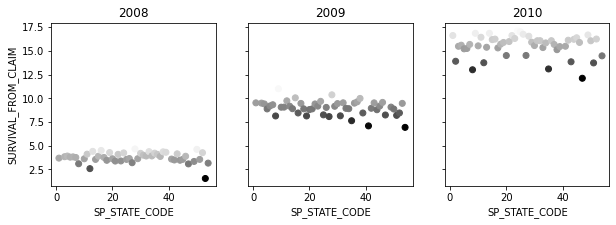

In [69]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10,3))
ax[0].title.set_text('2008')
ax[0].scatter(x = survival_2008['SP_STATE_CODE'], y = survival_2008['SURVIVAL_FROM_CLAIM'], c = survival_2008['SURVIVAL_FROM_CLAIM'], cmap = 'gray')
ax[0].set_xlabel('SP_STATE_CODE')
ax[0].set_ylabel('SURVIVAL_FROM_CLAIM')

ax[1].title.set_text('2009')
ax[1].scatter(x = survival_2009['SP_STATE_CODE'], y = survival_2009['SURVIVAL_FROM_CLAIM'], c = survival_2009['SURVIVAL_FROM_CLAIM'], cmap = 'gray')
ax[1].set_xlabel('SP_STATE_CODE')

ax[2].title.set_text('2010')
ax[2].scatter(x = survival_2010['SP_STATE_CODE'], y = survival_2010['SURVIVAL_FROM_CLAIM'], c = survival_2010['SURVIVAL_FROM_CLAIM'], cmap = 'gray')
ax[2].set_xlabel('SP_STATE_CODE')

It looks like outcomes improved within all locales as the years progressed, which is consistent with advancements in medical standards and treatments.

In [70]:
pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.4
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.